
# SVM Training with scikit-learn (Pipeline + Metrics)


In [3]:

# === Setup ===
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             classification_report, confusion_matrix, roc_auc_score, roc_curve)

import matplotlib.pyplot as plt
from joblib import dump

# Path to the dataset (update if needed)
DATA_PATH = "../data/HR_cleaned_dataset.csv"

# If you know the target column, set it here; otherwise keep as None to auto-detect
TARGET_COLUMN = "left"

In [4]:

# === Load data & preview ===
df = pd.read_csv(DATA_PATH)
print(f"Shape: {df.shape}")
display(df.head())  # In Jupyter, this renders as a nice table
df.info()


Shape: (11991, 19)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11991 entries, 0 to 11990
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   salary                 11991 non-null  int64  
 9   dept_IT                11991 non-null  int64  
 10  dept_RandD             11991 non-null  int64  
 11  dept_accounting        11991 non-null  int64  
 12  dept_hr                11991 non-null  int64  
 13  dept_management        11991 non-null  int64  
 14  dept_marketing         11991 non-null  int64  
 15  de

In [8]:
# === Set target column explicitly ===
target_col = "left"   # fixed target column
print("Using target column:", target_col)

# Split target vs features
y = df[target_col]
X = df.drop(columns=[target_col])

# Identify numeric vs categorical features
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

print(f"Numeric features: {len(numeric_features)} | Categorical features: {len(categorical_features)}")


Using target column: left
Numeric features: 18 | Categorical features: 0


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                    test_size = 0.40, 
                                    random_state=1)

In [12]:

## Linear Kernel  ---------------
steps = [('scaler', StandardScaler()),         
        ('svc', SVC(
            kernel='linear',
            C=0.1,                       # <- best param from grid search
            class_weight='balanced'))]

svcL_pipeline = Pipeline(steps)
svcL_pipeline.fit(X_train, y_train)

## Polynomial Kernel -----------------------
steps = [('scaler', StandardScaler()),         
        ('svc', SVC(
            kernel='poly',
            C=3,                          # <- best param from grid search
            degree=3,                     # <- best param from grid search
            gamma=0.03,                   # <- best param from grid search
            coef0=1.0,                    # <- best param from grid search
            class_weight='balanced',
            probability=True))]

svcPoly_pipeline = Pipeline(steps)
svcPoly_pipeline.fit(X_train, y_train)

## RBF Kernel -----------------------
steps = [('scaler', StandardScaler()),         
        ('svc', SVC(
            kernel='rbf',
            C=10,                        # <- best param from grid search
            gamma=0.03,                  # <- best param from grid search
            class_weight='balanced',
            probability=True))]

svcRBF_pipeline = Pipeline(steps)
svcRBF_pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('svc',
                 SVC(C=10, class_weight='balanced', gamma=0.03,
                     probability=True))])

In [13]:
ypred_train = svcL_pipeline.predict(X_train)
mat_clf = confusion_matrix(y_train, ypred_train)
report_clf = classification_report(y_train, ypred_train)

print(mat_clf)
print(report_clf)

scores = svcL_pipeline.decision_function(X_train)
auc = roc_auc_score(y_train, scores)
print(auc)

[[4448 1555]
 [ 124 1067]]
              precision    recall  f1-score   support

           0       0.97      0.74      0.84      6003
           1       0.41      0.90      0.56      1191

    accuracy                           0.77      7194
   macro avg       0.69      0.82      0.70      7194
weighted avg       0.88      0.77      0.79      7194

0.8400034519544034


In [39]:
#--------------------------------------------------
## Model Evaluation ## 
#--------------------------------------------------



ypred_test = svcL_pipeline.predict(X_test)
mat_clf = confusion_matrix(y_test, ypred_test)
report_clf = classification_report(y_test, ypred_test)

print(mat_clf)
print(report_clf)
scores = svcL_pipeline.decision_function(X_test)
auc = roc_auc_score(y_test, scores)
print(auc)


[[2974 1023]
 [ 108  692]]
              precision    recall  f1-score   support

           0       0.96      0.74      0.84      3997
           1       0.40      0.86      0.55       800

    accuracy                           0.76      4797
   macro avg       0.68      0.80      0.70      4797
weighted avg       0.87      0.76      0.79      4797

0.832457155366525


In [15]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ("svm", SVC(probability=True, class_weight="balanced", random_state=42))
])

# ==== parameter grids (list of dicts allows switching kernel) ====
param_grid = [
    {  # linear
        "svm__kernel": ["linear"],
        "svm__C": [0.1, 1, 3, 5, 7, 10]
    }
]

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# For binary classification, AUC is a solid choice:
grid = GridSearchCV(
    pipe, param_grid=param_grid,
    scoring="roc_auc", cv=cv, n_jobs=-1, verbose=1
)

grid.fit(X_train, y_train)
print("Best params:", grid.best_params_)
print("Best CV score (ROC AUC):", grid.best_score_)

best_clf = grid.best_estimator_


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best params: {'svm__C': 0.1, 'svm__kernel': 'linear'}
Best CV score (ROC AUC): 0.837319800812162


In [16]:
results = pd.DataFrame({
    "actual": y_test,
    "predicted": ypred_test
})

# Add correctness flag
results["correct"] = (results["actual"] == results["predicted"]).astype(int)

print(results.head(15))   # preview first 15 rows

       actual  predicted  correct
3618        0          1        0
8758        0          0        1
7477        0          0        1
6971        0          0        1
4793        0          0        1
7098        0          0        1
7370        0          0        1
6481        0          0        1
11978       0          1        0
9202        0          1        0
5185        0          0        1
2574        0          0        1
2158        0          0        1
35          1          1        1
2820        0          0        1


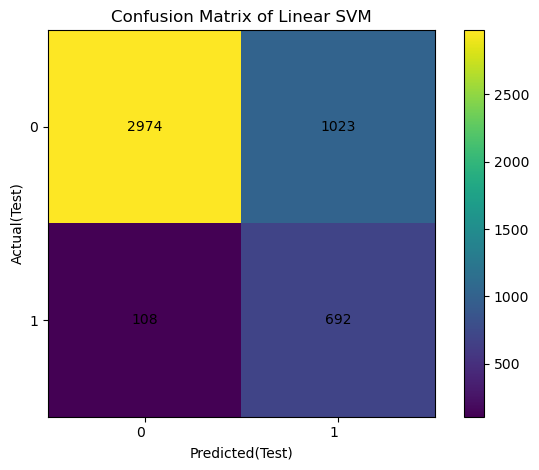

In [40]:
# === Confusion Matrix Plot ===
cm = confusion_matrix(y_test, ypred_test)
fig = plt.figure()
im = plt.imshow(cm, interpolation='nearest', cmap=plt.cm.viridis)  
plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix of Linear SVM")
plt.xlabel("Predicted(Test)")
plt.ylabel("Actual(Test)")
xticks = np.arange(len(np.unique(y_test)))
yticks = np.arange(len(np.unique(y_test)))
plt.xticks(ticks=xticks, labels=np.unique(y_test), rotation=0, ha="right")
plt.yticks(ticks=yticks, labels=np.unique(y_test))
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")
plt.colorbar(im)
plt.tight_layout()
plt.show()

AUC (train): 0.8400
AUC (test) : 0.8325


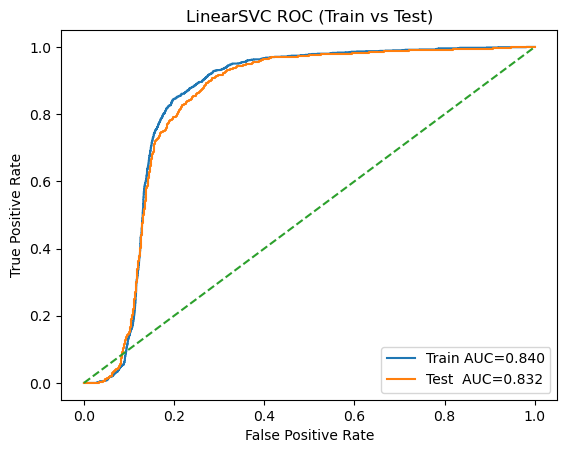

In [19]:
def get_scores(model, X):
    s = model.decision_function(X)
    return s[:, 1] if s.ndim > 1 else s

y_score_tr = get_scores(svcL_pipeline, X_train)
y_score_te = get_scores(svcL_pipeline, X_test)

auc_tr = roc_auc_score(y_train, y_score_tr)
auc_te = roc_auc_score(y_test,  y_score_te)
print(f"AUC (train): {auc_tr:.4f}")
print(f"AUC (test) : {auc_te:.4f}")

# Plot ROC
fpr_tr, tpr_tr, _ = roc_curve(y_train, y_score_tr)
fpr_te, tpr_te, _ = roc_curve(y_test,  y_score_te)

plt.plot(fpr_tr, tpr_tr, label=f"Train AUC={auc_tr:.3f}")
plt.plot(fpr_te, tpr_te, label=f"Test  AUC={auc_te:.3f}")
plt.plot([0,1],[0,1], "--")
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("LinearSVC ROC (Train vs Test)")
plt.legend(); plt.show()

In [20]:
ypred_train = svcPoly_pipeline.predict(X_train)
mat_clf = confusion_matrix(y_train, ypred_train)
report_clf = classification_report(y_train, ypred_train)

print(mat_clf)
print(report_clf)

scores = svcPoly_pipeline.decision_function(X_train)
auc = roc_auc_score(y_train, scores)
print(auc)

[[5729  274]
 [  75 1116]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      6003
           1       0.80      0.94      0.86      1191

    accuracy                           0.95      7194
   macro avg       0.89      0.95      0.92      7194
weighted avg       0.96      0.95      0.95      7194

0.9794965377652624


In [41]:
#--------------------------------------------------
## Model Evaluation ## 
#--------------------------------------------------



ypred_test = svcPoly_pipeline.predict(X_test)
mat_clf = confusion_matrix(y_test, ypred_test)
report_clf = classification_report(y_test, ypred_test)

print(mat_clf)
print(report_clf)
scores = svcPoly_pipeline.decision_function(X_test)
auc = roc_auc_score(y_test, scores)
print(auc)


[[3746  251]
 [  64  736]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      3997
           1       0.75      0.92      0.82       800

    accuracy                           0.93      4797
   macro avg       0.86      0.93      0.89      4797
weighted avg       0.94      0.93      0.94      4797

0.9630904428321241


In [64]:

from sklearn.model_selection import GridSearchCV, StratifiedKFold

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ("svm", SVC(probability=True, class_weight="balanced", random_state=42))
])

# ==== parameter grids (list of dicts allows switching kernel) ====
param_grid = [
    {  # poly
        "svm__kernel": ["poly"],
        "svm__C": [0.1, 1, 3],
        "svm__degree": [2, 3, 4, 5],
        "svm__gamma": ["scale", 0.1, 0.03, 0.01],
        "svm__coef0": [0.0, 0.5, 1.0]
    }
]

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
# For binary classification, AUC is a solid choice:
grid = GridSearchCV(
    pipe, param_grid=param_grid,
    scoring="roc_auc", cv=cv, n_jobs=-1, verbose=1
)

grid.fit(X_train, y_train)
print("Best params:", grid.best_params_)
print("Best CV score (ROC AUC):", grid.best_score_)

best_clf = grid.best_estimator_


Fitting 3 folds for each of 144 candidates, totalling 432 fits
Best params: {'svm__C': 3, 'svm__coef0': 1.0, 'svm__degree': 3, 'svm__gamma': 0.03, 'svm__kernel': 'poly'}
Best CV score (ROC AUC): 0.9681716656365351


In [22]:
results = pd.DataFrame({
    "actual": y_test,
    "predicted": ypred_test
})

# Add correctness flag
results["correct"] = (results["actual"] == results["predicted"]).astype(int)

print(results.head(15))   # preview first 15 rows

       actual  predicted  correct
3618        0          0        1
8758        0          0        1
7477        0          0        1
6971        0          0        1
4793        0          0        1
7098        0          0        1
7370        0          0        1
6481        0          0        1
11978       0          0        1
9202        0          0        1
5185        0          0        1
2574        0          0        1
2158        0          0        1
35          1          1        1
2820        0          0        1


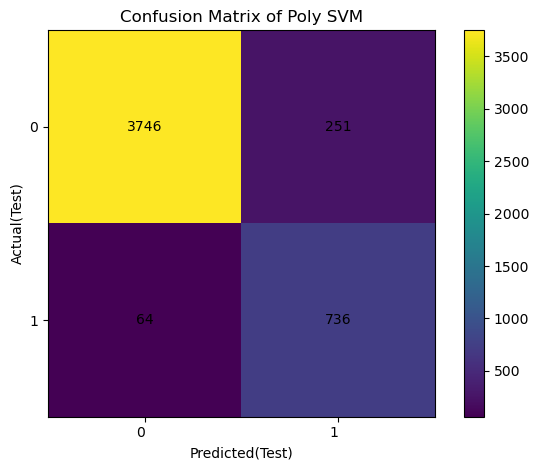

In [42]:
# === Confusion Matrix Plot ===
cm = confusion_matrix(y_test, ypred_test)
fig = plt.figure()
im = plt.imshow(cm, interpolation='nearest', cmap=plt.cm.viridis)  
plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix of Poly SVM")
plt.xlabel("Predicted(Test)")
plt.ylabel("Actual(Test)")
xticks = np.arange(len(np.unique(y_test)))
yticks = np.arange(len(np.unique(y_test)))
plt.xticks(ticks=xticks, labels=np.unique(y_test), rotation=0, ha="right")
plt.yticks(ticks=yticks, labels=np.unique(y_test))
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")
plt.colorbar(im)
plt.tight_layout()
plt.show()

AUC (train): 0.9795
AUC (test) : 0.9631


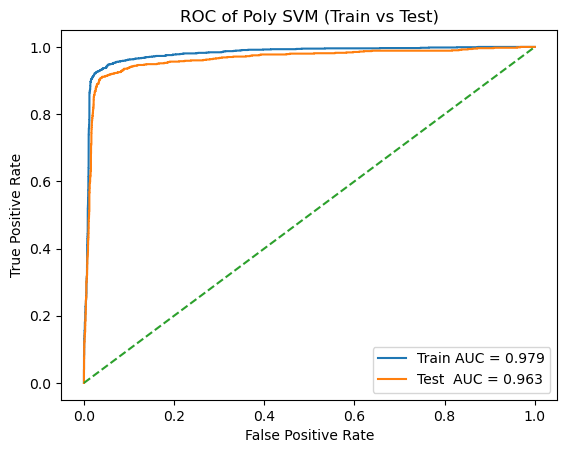

In [27]:
# --- Get probabilities for the positive class ---
def get_scores(model, X):
    if hasattr(model, "predict_proba"):
        return model.predict_proba(X)[:, 1]
    if hasattr(model, "decision_function"):
        s = model.decision_function(X)
        return s[:, 1] if s.ndim > 1 else s
    raise AttributeError("Final estimator has neither predict_proba nor decision_function()")

# --- compute scores & AUC on TRAIN and TEST ---
y_score_tr = get_scores(svcPoly_pipeline, X_train)
y_score_te = get_scores(svcPoly_pipeline, X_test)

auc_tr = roc_auc_score(y_train, y_score_tr)
auc_te = roc_auc_score(y_test,  y_score_te)
print(f"AUC (train): {auc_tr:.4f}")
print(f"AUC (test) : {auc_te:.4f}")

# --- plot ROC curves for TRAIN and TEST on the same figure ---
fpr_tr, tpr_tr, _ = roc_curve(y_train, y_score_tr)
fpr_te, tpr_te, _ = roc_curve(y_test,  y_score_te)

plt.plot(fpr_tr, tpr_tr, label=f"Train AUC = {auc_tr:.3f}")
plt.plot(fpr_te, tpr_te, label=f"Test  AUC = {auc_te:.3f}")
plt.plot([0,1],[0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC of Poly SVM (Train vs Test)")
plt.legend(loc="lower right")
plt.show()

In [28]:
ypred_train = svcRBF_pipeline.predict(X_train)
mat_clf = confusion_matrix(y_train, ypred_train)
report_clf = classification_report(y_train, ypred_train)

print(mat_clf)
print(report_clf)

scores = svcRBF_pipeline.decision_function(X_train)
auc = roc_auc_score(y_train, scores)
print(auc)

[[5738  265]
 [  64 1127]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      6003
           1       0.81      0.95      0.87      1191

    accuracy                           0.95      7194
   macro avg       0.90      0.95      0.92      7194
weighted avg       0.96      0.95      0.96      7194

0.9823960116219528


In [29]:
#--------------------------------------------------
## Model Evaluation ## 
#--------------------------------------------------
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score


ypred_test = svcRBF_pipeline.predict(X_test)
mat_clf = confusion_matrix(y_test, ypred_test)
report_clf = classification_report(y_test, ypred_test)

print(mat_clf)
print(report_clf)
scores = svcRBF_pipeline.decision_function(X_test)
auc = roc_auc_score(y_test, scores)
print(auc)



[[3754  243]
 [  66  734]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      3997
           1       0.75      0.92      0.83       800

    accuracy                           0.94      4797
   macro avg       0.87      0.93      0.89      4797
weighted avg       0.94      0.94      0.94      4797

0.9647673254941206


In [66]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ("svm", SVC(probability=True, class_weight="balanced", random_state=42))
])

# ==== parameter grids (list of dicts allows switching kernel) ====
param_grid = [
    {  # rbf
        "svm__kernel": ["rbf"],
        "svm__C": [0.1, 1, 3, 10],
        "svm__gamma": ["scale", 0.1, 0.03, 0.01]
    }
]

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# For binary classification, AUC is a solid choice:
grid = GridSearchCV(
    pipe, param_grid=param_grid,
    scoring="roc_auc", cv=cv, n_jobs=-1, verbose=1
)

grid.fit(X_train, y_train)
print("Best params:", grid.best_params_)
print("Best CV score (ROC AUC):", grid.best_score_)

best_clf = grid.best_estimator_


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best params: {'svm__C': 10, 'svm__gamma': 0.03, 'svm__kernel': 'rbf'}
Best CV score (ROC AUC): 0.968502692825987


In [30]:
results = pd.DataFrame({
    "actual": y_test,
    "predicted": ypred_test
})

# Add correctness flag
results["correct"] = (results["actual"] == results["predicted"]).astype(int)

print(results.head(15))   # preview first 15 rows

       actual  predicted  correct
3618        0          0        1
8758        0          0        1
7477        0          0        1
6971        0          0        1
4793        0          0        1
7098        0          0        1
7370        0          0        1
6481        0          0        1
11978       0          0        1
9202        0          0        1
5185        0          0        1
2574        0          0        1
2158        0          0        1
35          1          1        1
2820        0          0        1


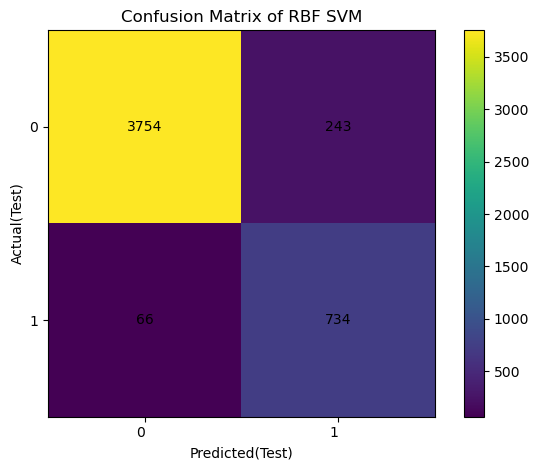

In [ ]:

# === Confusion Matrix Plot ===
cm = confusion_matrix(y_test, ypred_test)
fig = plt.figure()
im = plt.imshow(cm, interpolation='nearest', cmap=plt.cm.viridis)  
plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix of RBF SVM")
plt.xlabel("Predicted(Test)")
plt.ylabel("Actual(Test)")
xticks = np.arange(len(np.unique(y_test)))
yticks = np.arange(len(np.unique(y_test)))
plt.xticks(ticks=xticks, labels=np.unique(y_test), rotation=0, ha="right")
plt.yticks(ticks=yticks, labels=np.unique(y_test))
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")
plt.colorbar(im)
plt.tight_layout()
plt.show()


AUC (train): 0.9824
AUC (test) : 0.9648


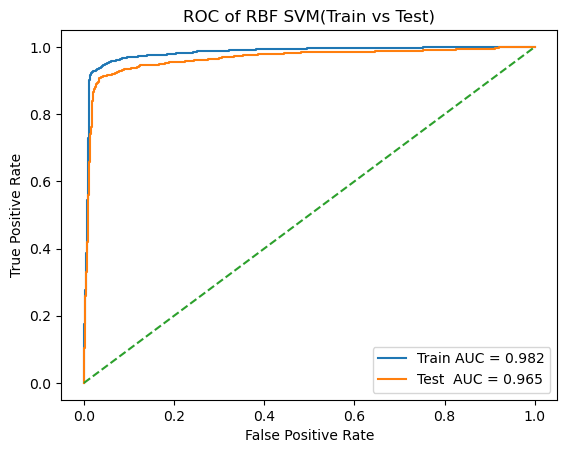

In [33]:
# --- Get probabilities for the positive class ---
def get_scores(model, X):
    if hasattr(model, "predict_proba"):
        return model.predict_proba(X)[:, 1]
    if hasattr(model, "decision_function"):
        s = model.decision_function(X)
        return s[:, 1] if s.ndim > 1 else s
    raise AttributeError("Final estimator has neither predict_proba nor decision_function()")

# --- compute scores & AUC on TRAIN and TEST ---
y_score_tr = get_scores(svcRBF_pipeline, X_train)
y_score_te = get_scores(svcRBF_pipeline, X_test)

auc_tr = roc_auc_score(y_train, y_score_tr)
auc_te = roc_auc_score(y_test,  y_score_te)
print(f"AUC (train): {auc_tr:.4f}")
print(f"AUC (test) : {auc_te:.4f}")

# --- plot ROC curves for TRAIN and TEST on the same figure ---
fpr_tr, tpr_tr, _ = roc_curve(y_train, y_score_tr)
fpr_te, tpr_te, _ = roc_curve(y_test,  y_score_te)

plt.plot(fpr_tr, tpr_tr, label=f"Train AUC = {auc_tr:.3f}")
plt.plot(fpr_te, tpr_te, label=f"Test  AUC = {auc_te:.3f}")
plt.plot([0,1],[0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC of RBF SVM(Train vs Test)")
plt.legend(loc="lower right")
plt.show()


In [57]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ("svm", SVC(probability=True, class_weight="balanced", random_state=42))
])

# ==== parameter grids (list of dicts allows switching kernel) ====
param_grid = [
    {  # linear
        "svm__kernel": ["linear"],
        "svm__C": [0.1, 1, 3, 10]
    },
    {  # poly
        "svm__kernel": ["poly"],
        "svm__C": [0.1, 1, 3],
        "svm__degree": [2, 3, 4, 5],
        "svm__gamma": ["scale", 0.1, 0.03, 0.01],
        "svm__coef0": [0.0, 0.5, 1.0]
    },
    {  # rbf
        "svm__kernel": ["rbf"],
        "svm__C": [0.1, 1, 3, 10],
        "svm__gamma": ["scale", 0.1, 0.03, 0.01]
    }
]

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
# For binary classification, AUC is a solid choice:
grid = GridSearchCV(
    pipe, param_grid=param_grid,
    scoring="roc_auc", cv=cv, n_jobs=-1, verbose=1
)

grid.fit(X_train, y_train)
print("Best params:", grid.best_params_)
print("Best CV score (ROC AUC):", grid.best_score_)

best_clf = grid.best_estimator_


Fitting 3 folds for each of 164 candidates, totalling 492 fits
Best params: {'svm__C': 10, 'svm__gamma': 0.03, 'svm__kernel': 'rbf'}
Best CV score (ROC AUC): 0.968292512014354
